# Experiment3
In this exp., I focus **"simple_world_comm"**.  
From the expeiriment1, max_epi_len of scenarios looked too short to learn.  
I changed the max_epi_len here; the results are desribed in   
**my_note/ana_exp3.ipyhb**.


## exp3-1

#### simple_world_comm__2018-03-16-_11-23-33
- max_episode_len is 400

#### simple_world_comm__2018-03-17-_01-02-02
- max_episode_len is 50

#### simple_world_comm__2018-03-17-_06-33-56
- max_episode_len is 100

----

## exp3-2

#### simple_world_comm__2018-03-18_09-15-43
- max_episode_len increases by episode (25 -> 200).
    - the episode period where the max_epi_len become twice is 5000 epi.

#### simple_world_comm__2018-03-18_21-12-56
- max_episode_len increases by episode (25 -> 200).
    - The episode period where the max_epi_len become twice is 10000 epi.

In [18]:
%matplotlib inline
import os
import os.path as osp
import re
import glob
from IPython.display import HTML
from IPython.display import display

exp_dir = '../exp_results/exp3_180317'
par_dir = '../params/'


def play_linked_video(each_exp_dir, fn_video, width=500, height=300):
    link_dir = osp.join('./videos', osp.basename(each_exp_dir))
    if osp.lexists(link_dir):
        os.remove(link_dir)
    os.symlink(osp.abspath(each_exp_dir), link_dir)
    fn_video = osp.join(link_dir, 'videos/%s' % fn_video)
    return _play_video(fn_video, width, height)

def _play_video(fn_video, width=500, height=300):
    print(fn_video)
    return HTML("""
    <video width="%d" height="%d" controls>
      <source src="%s" type="video/mp4">
    </video>""" % (width, height, fn_video))

def get_exp_dir(exp_dir, scenario):
    for fn in glob.glob(osp.join(exp_dir, '*')):
        if re.search(scenario + '__', fn):
            return fn

def get_scenario_df(exp_dir, scenario, fn_rewards):
    each_exp_dir = get_exp_dir(exp_dir, scenario)
    fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rewards)
    df_lc = pd.read_csv(fn_lc, index_col=False)
    return df_lc
    
def plot_each_lc(scenario):
    fn_lcs = ['rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    for i, fn_rew in enumerate(fn_lcs):
        df_lc = get_scenario_df(exp_dir, scenario, fn_rew)
        df_lc.plot(x='step', style='-o', fontsize=16, ax=axes[i], title=scenario, alpha=0.5)

def plot_each_lc2(each_exp_dir):
    fn_lcs = ['rewards.csv', 'rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    for i, fn_rew in enumerate(fn_lcs):
        fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rew)
        df_lc = pd.read_csv(fn_lc, index_col=False)
        df_lc.columns = [coln.strip() for coln in df_lc.columns]
        if i == 0:
            df_lc['step_per_epi'] = df_lc[['step']].diff().values / df_lc[['episode']].diff().values
            df_lc.plot(x='episode', y='step_per_epi', style='-o', fontsize=12, 
                               ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)
        else:
            del df_lc['step']
            df_lc.plot(x='episode', style='-o', fontsize=12, ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)
    #     break

def action_space(scenario):
    from multiagent.environment import MultiAgentEnv
    import multiagent.scenarios as scenarios
    fn = osp.join('../../../multiagent-particle-envs/multiagent/scenarios/%s.py' % scenario)
    scenario = scenarios.load(fn).Scenario()
    world = scenario.make_world()
    env = MultiAgentEnv(world, scenario.reset_world, scenario.reward, scenario.observation)
    print(env.action_space)

In [12]:
def _make_dic():
    import string
    abc = string.ascii_uppercase
    dic = dict(zip(abc, range(1, len(abc)+1)))
    dic['_'] = 0
    return dic

def to_case_val(case):
    dic = _make_dic()
    return dic[case]

def to_val_case(val):
    dic = _make_dic()
    dic_rev = dict([(v, k) for k, v in dic.items()])
    return dic_rev[val]

def get_df_messages2(fn_video):
    fn_message = fn_video.replace('.mp4', '_messages.csv')
    df_msg = pd.read_csv(fn_message)
    for coln in df_msg.columns[:-2]:
        if np.all(df_msg[coln] == '_'):
            del df_msg[coln]
        else:
            df_msg[coln] = df_msg[coln].apply(to_case_val)
    return df_msg

def plot_messages2(fn_video):
    df_msg = get_df_messages2(fn_video)
    each_epis = sorted(df_msg.episode.unique())
    fig, axes = plt.subplots(1, len(each_epis), figsize=(7*len(each_epis), 5), sharey=True)

    yticks = range(int(df_msg.iloc[:, :-2].values.max()) + 1)
    for i, i_epi in enumerate(each_epis):
        ax = axes[i]
        df_msg.loc[df_msg.episode==i_epi, df_msg.columns != 'episode']\
            .plot(x='step', style='-o', ax=ax,
                     alpha=0.5, title='i_epi=%d' % i_epi)
        ax.set_yticks(yticks)
        ax.set_yticklabels([to_val_case(v) for v in yticks])
    plt.subplots_adjust(wspace=0.05, hspace=0)

In [13]:
def _oldplot_each_lc2(each_exp_dir):
    fn_lcs = ['rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    for i, fn_rew in enumerate(fn_lcs):
        fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rew)
        df_lc = pd.read_csv(fn_lc, index_col=False)
        df_lc.columns = [coln.strip() for coln in df_lc.columns]
        df_lc.plot(x='step', style='-o', fontsize=12, ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)

### 3-1-1. simple_tag__2018-03-16-_09-49-25
- max_episode_len is 400

None

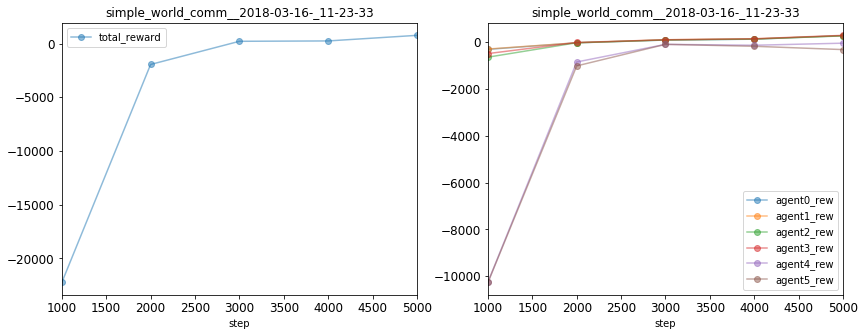

./videos/simple_world_comm__2018-03-16-_11-23-33/videos/video-5000.mp4


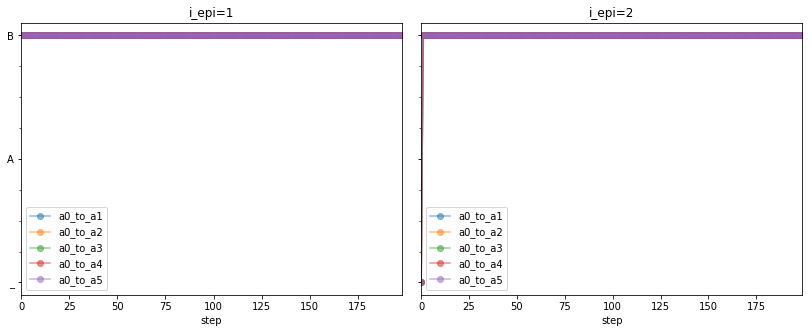

In [23]:
each_exp_dir= 'simple_world_comm__2018-03-16-_11-23-33'
fn_video_template = 'video-{}.mp4'
epis = [5000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(_oldplot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_messages2(osp.join(each_exp_dir, 'videos', fn_video))
    plt.show()

### 3-1-2. simple_world_comm__2018-03-17-_01-02-02
- max_episode_len is 50


None

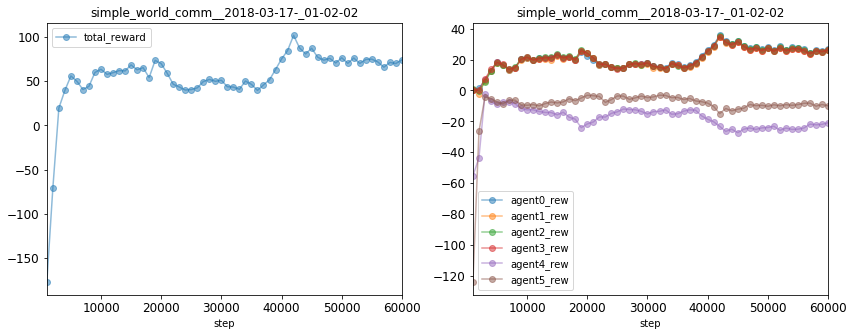

In [24]:
each_exp_dir= 'simple_world_comm__2018-03-17-_01-02-02'
epis = [30000, 60000]

fn_video_template = 'video-{}.mp4'
each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(_oldplot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_messages2(osp.join(each_exp_dir, 'videos', fn_video))
    plt.show()

### 3-1-3. simple_world_comm__2018-03-17-_06-33-56
- max_episode_len is 100


None

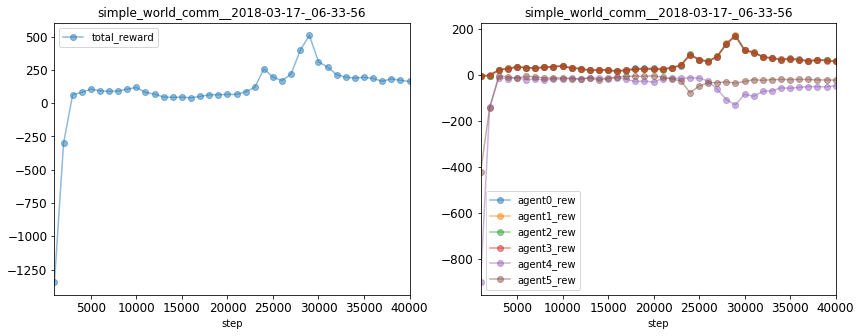

In [25]:
each_exp_dir = 'simple_world_comm__2018-03-17-_06-33-56'
epis = [20000, 40000]

fn_video_template = 'video-{}.mp4'
each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(_oldplot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_messages2(osp.join(each_exp_dir, 'videos', fn_video))
    plt.show()

## exp3-2
### 3-2-1. simple_world_comm__2018-03-18_09-15-43
- max_episode_len increases by episode (25 -> 200).
    - the episode period where the max_epi_len become twice is 5000 epi.


None

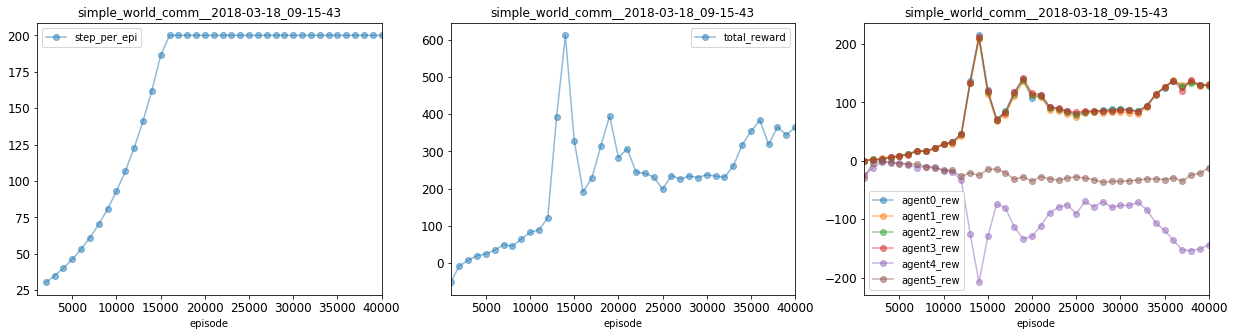

In [27]:
each_exp_dir = 'simple_world_comm__2018-03-18_09-15-43'
epis = [15000, 30000, 40000]

fn_video_template = 'video-{}.mp4'
each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_messages2(osp.join(each_exp_dir, 'videos', fn_video))
    plt.show()

### 3-2-2. simple_world_comm__2018-03-18_21-12-56
- max_episode_len increases by episode (25 -> 200).
    - The episode period where the max_epi_len become twice is 10000 epi.

None

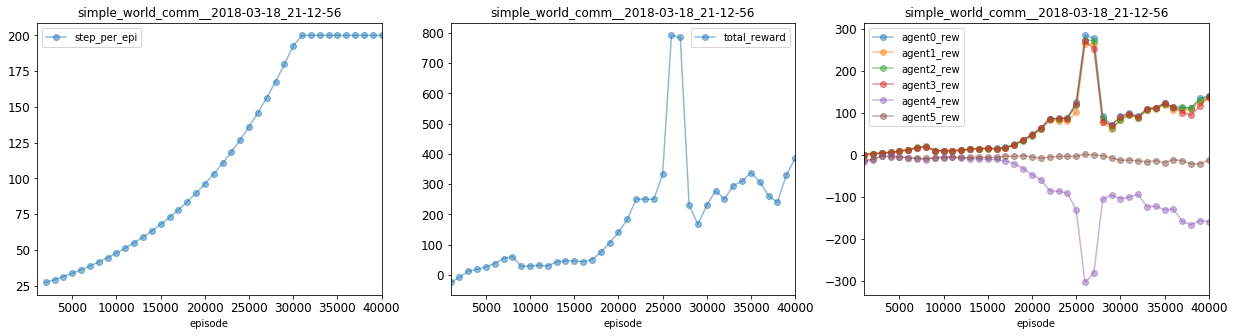

In [28]:
each_exp_dir = 'simple_world_comm__2018-03-18_21-12-56'
epis = [15000, 25000, 40000]

fn_video_template = 'video-{}.mp4'
each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_messages2(osp.join(each_exp_dir, 'videos', fn_video))
    plt.show()